<a href="https://colab.research.google.com/github/Bunnykey/PFDS/blob/master/knnclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

#data load
wine = load_wine()
df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

wine.feature_names, wine.target

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]))

In [2]:
df.head() #pandas dataframe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [3]:
#data split
X,y = load_wine(return_X_y = True)

# "The answer to life, the universe, and everything is 42." - The Hitchiker's Guide to the Galaxy
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, train_size = 0.7,
                                                    random_state = 42, shuffle = True)

In [4]:
#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

stdModel = Pipeline([
('scaler', StandardScaler()),
('classifier', KNeighborsClassifier(n_neighbors = 3)),
])

robustModel = Pipeline([
('scaler', RobustScaler()),
('classifier', KNeighborsClassifier(n_neighbors = 3)),
])

minmaxModel = Pipeline([
('scaler', MinMaxScaler()),
('classifier', KNeighborsClassifier(n_neighbors = 3)),
])

normalModel = Pipeline([
('scaler', Normalizer()),
('classifier', KNeighborsClassifier(n_neighbors = 3)),
])

stdClf = stdModel.fit(X_train, y_train)
robustClf = robustModel.fit(X_train, y_train)
minmaxClf = minmaxModel.fit(X_train, y_train)
normalClf = normalModel.fit(X_train, y_train)

In [5]:
from sklearn.metrics import accuracy_score
y_train_hat1 = stdClf.predict(X_train)
print('std train accuracy :', accuracy_score(y_train, y_train_hat1))
y_test_hat1 = stdClf.predict(X_test)
print('std test accuracy :', accuracy_score(y_test, y_test_hat1))

y_train_hat2 = robustClf.predict(X_train)
print('robust train accuracy :', accuracy_score(y_train, y_train_hat2))
y_test_hat2 = robustClf.predict(X_test)
print('robust test accuracy :', accuracy_score(y_test, y_test_hat2))

y_train_hat3 = minmaxClf.predict(X_train)
print('minmax train accuracy :', accuracy_score(y_train, y_train_hat3))
y_test_hat3 = minmaxClf.predict(X_test)
print('minmax test accuracy :', accuracy_score(y_test, y_test_hat3))

y_train_hat4 = normalClf.predict(X_train)
print('normal train accuracy :', accuracy_score(y_train, y_train_hat4))
y_test_hat4 = normalClf.predict(X_test)
print('normal test accuracy :', accuracy_score(y_test, y_test_hat4))

std train accuracy : 0.9516129032258065
std test accuracy : 0.9629629629629629
robust train accuracy : 0.9435483870967742
robust test accuracy : 0.9629629629629629
minmax train accuracy : 0.967741935483871
minmax test accuracy : 0.9629629629629629
normal train accuracy : 0.8790322580645161
normal test accuracy : 0.7777777777777778


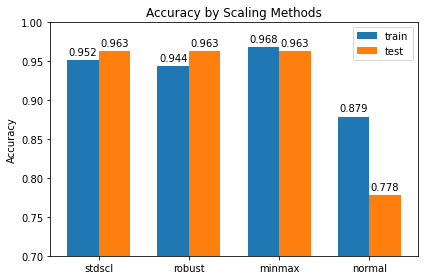

In [6]:
# visualization
labels = ['stdscl', 'robust', 'minmax', 'normal']
x = np.arange(len(labels))
width = 0.35
trainHatList = [y_train_hat1, y_train_hat2, y_train_hat3, y_train_hat4]
testHatList = [y_test_hat1, y_test_hat2, y_test_hat3, y_test_hat4]

trainScores = []
testScores = []
for i in trainHatList:
  trainScores.append(accuracy_score(y_train,i))
for i in testHatList:
  testScores.append(accuracy_score(y_test,i))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, trainScores, width, label='train')
rects2 = ax.bar(x + width/2, testScores, width, label='test')

ax.set_ylim(0.7,1.0)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Scaling Methods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        pyheight = round(height,3)
        ax.annotate('{}'.format(pyheight),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [7]:
# applied minMAXScaler
# hyperParameters
neighborSet = range(2,10)
trainAcc = []
testAcc = []

for n in neighborSet:
  minmaxModel = Pipeline([
  ('scaler', MinMaxScaler()),
  ('classifier', KNeighborsClassifier(n_neighbors = n, metric = 'minkowski')), 
  ]) # normed vector space Euclidean Distance?
  minmaxClf = minmaxModel.fit(X_train, y_train)
  y_train_hat3 = minmaxClf.predict(X_train)
  print('minmax train accuracy :', accuracy_score(y_train, y_train_hat3))
  trainAcc.append(accuracy_score(y_train, y_train_hat3))
  y_test_hat3 = minmaxClf.predict(X_test)
  print('minmax test accuracy :', accuracy_score(y_test, y_test_hat3))
  testAcc.append(accuracy_score(y_test, y_test_hat3))

minmax train accuracy : 0.967741935483871
minmax test accuracy : 0.9444444444444444
minmax train accuracy : 0.967741935483871
minmax test accuracy : 0.9629629629629629
minmax train accuracy : 0.967741935483871
minmax test accuracy : 0.9629629629629629
minmax train accuracy : 0.9838709677419355
minmax test accuracy : 0.9444444444444444
minmax train accuracy : 0.9758064516129032
minmax test accuracy : 0.9629629629629629
minmax train accuracy : 0.967741935483871
minmax test accuracy : 0.9629629629629629
minmax train accuracy : 0.967741935483871
minmax test accuracy : 0.9629629629629629
minmax train accuracy : 0.967741935483871
minmax test accuracy : 0.9814814814814815


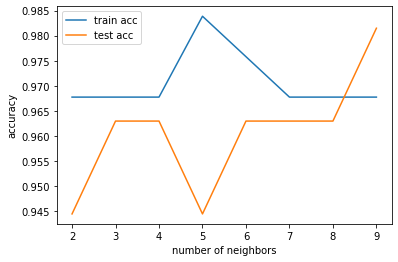

In [8]:
fig, acc_ax = plt.subplots()
acc_ax.plot(neighborSet, trainAcc, color ='tab:blue', label = 'train acc')
acc_ax.plot(neighborSet, testAcc, color ='tab:orange', label = 'test acc')
acc_ax.set_ylabel('accuracy')
acc_ax.set_xlabel('number of neighbors')
acc_ax.legend()
plt.show()